In [1]:
from IPython.display import display
import matplotlib.pyplot as plt

from loaders.options_chain import load_options_chain_dataframe
from loaders.ch_mdc_public_trades import get_ag_mdc_public_trades_ohlc_1m
from loaders.ch_volatility import get_realized_volatility_1m

from nodes import NodesDataframe
from volatility_surface import VolatilitySurface

from common import calculate_time_to_maturity

In [2]:
"""
Reload all modules AND autoload newly added objects
  every time before executing the Python code typed.
"""

%load_ext autoreload
%autoreload 3

**Settings**

In [3]:
# Option - axl
target_token = 'axl'
start_date = '2023-07-21 00:00:00'
end_date = '2024-01-21 00:00:00'
expiration_date = '2024-01-21 00:00:00'
strike_price = 0.35650628
premium = 0.15
strike_price *= (1+premium) # in quote asset (usd)
loan_amount = 7012499.08 # in base asset

# Option - hbar
# target_token = 'hbar'
# start_date = '2023-10-19 00:00:00'
# end_date = '2024-01-18 00:00:00'
# expiration_date = '2024-01-18 00:00:00'
# strike_price = 0.046704
# premium = 0
# strike_price *= (1+premium) # in quote asset (usd)
# loan_amount = 40000000 # in base asset


# usecase - deribit's options chain
tokens = {
    'source': ['eth'],
    'target': [f'{target_token}']
}

# usecase - spot price
symbols = {
    'source': ['ethusd'],
    'target': [f'{target_token}usd']
}

# usecase - realized volatility
instrument_ids = {
    'source': ['binance_eth_usdt_spot'],
    'target': [f'aggregated_{target_token}_usd_spot']
}


# Volatility Surface
interpolation_types = {
    'volatility_curve': 'cubic',
    'volatility_surface': 'linear'
}

extrapolation_types = {
    'volatility_curve': 'flat',
    'volatility_surface': 'square_root'
}

# Backtest
period = 'day'

## Load Data

**Options Chain**

In [4]:
df_options = load_options_chain_dataframe(start_date, end_date, tokens, symbols, instrument_ids, period='day')

display(df_options.head())
display(df_options.tail())

print(f"Number of rows: {len(df_options)}")

['2023-07-21 00:01:00', '2023-07-22 00:00:00', '2023-07-23 00:00:00', '2023-07-24 00:00:00', '2023-07-25 00:00:00', '2023-07-26 00:00:00', '2023-07-27 00:00:00', '2023-07-28 00:00:00', '2023-07-29 00:00:00', '2023-07-30 00:00:00', '2023-07-31 00:00:00', '2023-08-01 00:01:00', '2023-08-02 00:00:00', '2023-08-03 00:00:00', '2023-08-04 00:00:00', '2023-08-05 00:00:00', '2023-08-06 00:00:00', '2023-08-07 00:00:00', '2023-08-08 00:00:00', '2023-08-09 00:00:00', '2023-08-10 00:00:00', '2023-08-11 00:00:00', '2023-08-12 00:00:00', '2023-08-13 00:00:00', '2023-08-14 00:00:00', '2023-08-15 00:00:00', '2023-08-16 00:00:00', '2023-08-17 00:00:00', '2023-08-18 00:00:00', '2023-08-19 00:00:00', '2023-08-20 00:00:00', '2023-08-21 00:00:00', '2023-08-22 00:00:00', '2023-08-23 00:00:00', '2023-08-24 00:00:00', '2023-08-25 00:00:00', '2023-08-26 00:00:00', '2023-08-27 00:00:00', '2023-08-28 00:00:00', '2023-08-29 00:00:00', '2023-08-30 00:00:00', '2023-08-31 00:00:00', '2023-09-01 00:01:00', '2023-09-0

,current_date,token,expiration_date,K,F,option_price,S,T,r,rv,iv,delta
0,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1750.0,1894.55,5.115285,1891.500898,0.020076,0.080232,0.434,0.432324,0.907626
1,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1800.0,1894.55,9.662205,1891.500898,0.020076,0.080232,0.434,0.388808,0.830676
2,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1850.0,1894.55,19.892775,1891.500898,0.020076,0.080232,0.434,0.360358,0.688490
3,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1900.0,1894.55,35.238630,1891.500898,0.020076,0.080232,0.434,0.353978,0.487158
4,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1950.0,1894.55,18.187680,1891.500898,0.020076,0.080232,0.434,0.367942,0.298997


,current_date,token,expiration_date,K,F,option_price,S,T,r,rv,iv,delta
46377,2024-01-20,axl,2024-12-27 08:00:00,56.216757,0.983912,0.058155,0.9019,0.937258,0.092859,1.0897,1.986010,0.126583
46378,2024-01-20,axl,2024-12-27 08:00:00,69.130729,0.983912,0.050847,0.9019,0.937258,0.092859,1.0897,2.006987,0.111807
46379,2024-01-20,axl,2024-12-27 08:00:00,84.768398,0.983912,0.045526,0.9019,0.937258,0.092859,1.0897,2.034386,0.100665
46380,2024-01-20,axl,2024-12-27 08:00:00,102.669042,0.983912,0.040959,0.9019,0.937258,0.092859,1.0897,2.059342,0.091041
46381,2024-01-20,axl,2024-12-27 08:00:00,123.227010,0.983912,0.037138,0.9019,0.937258,0.092859,1.0897,2.083699,0.082903


Number of rows: 46382


**Spot Price**

In [5]:
df_spot_price = get_ag_mdc_public_trades_ohlc_1m(
    start_date, end_date, symbols['target']
)

Missing ts values: 0


**Realized Volatility**

In [6]:
df_realized_volatility_1m = get_realized_volatility_1m(
    start_date, end_date, instrument_ids['target'], rolling_window = '6_month', period = 'minute'
)

## Backtest

In [7]:
from pricing import black_scholes_option_delta
from portfolio_valuation import TheoreticalPortfolioValuation
from interest_rate import InterestRate

In [8]:
df_nodes = NodesDataframe(df_options, extrapolation_types['volatility_curve']).df_nodes

token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2023-07-28 08:00:00
token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2023-08-25 08:00:00
token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2023-09-29 08:00:00
token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2023-12-29 08:00:00
token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2024-03-29 08:00:00
token: eth | current date: 2023-07-21 00:01:00 | expiration date: 2024-06-28 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expiration date: 2023-08-04 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expiration date: 2023-08-25 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expiration date: 2023-09-29 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expiration date: 2023-12-29 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expiration date: 2024-03-29 08:00:00
token: eth | current date: 2023-07-22 00:00:00 | expir

**Volatility Surface - Nodes DataFrame**

In [9]:
df_options

,current_date,token,expiration_date,K,F,option_price,S,T,r,rv,iv,delta
0,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1750.000000,1894.550000,5.115285,1891.500898,0.020076,0.080232,0.4340,0.432324,0.907626
1,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1800.000000,1894.550000,9.662205,1891.500898,0.020076,0.080232,0.4340,0.388808,0.830676
2,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1850.000000,1894.550000,19.892775,1891.500898,0.020076,0.080232,0.4340,0.360358,0.688490
3,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1900.000000,1894.550000,35.238630,1891.500898,0.020076,0.080232,0.4340,0.353978,0.487158
4,2023-07-21 00:01:00,eth,2023-07-28 08:00:00,1950.000000,1894.550000,18.187680,1891.500898,0.020076,0.080232,0.4340,0.367942,0.298997
...,...,...,...,...,...,...,...,...,...,...,...,...
46377,2024-01-20 00:00:00,axl,2024-12-27 08:00:00,56.216757,0.983912,0.058155,0.901900,0.937258,0.092859,1.0897,1.986010,0.126583
46378,2024-01-20 00:00:00,axl,2024-12-27 08:00:00,69.130729,0.983912,0.050847,0.901900,0.937258,0.092859,1.0897,2.006987,0.111807
46379,2024-01-20 00:00:00,axl,2024-12-27 08:00:00,84.768398,0.983912,0.045526,0.901900,0.937258,0.092859,1.0897,2.034386,0.100665
46380,2024-01-20 00:00:00,axl,2024-12-27 08:00:00,102.669042,0.983912,0.040959,0.901900,0.937258,0.092859,1.0897,2.059342,0.091041


In [10]:
# Initial setup
first_current_date = df_nodes['current_date'].unique()[0]
df_spot_price = df_spot_price.loc[df_spot_price['ts'] >= first_current_date]

# Attempt to delete 'vs' if it exists from a previous run to avoid any conflicts
try:
    del vs
except NameError:
    pass  # 'vs' not defined, no need to delete

# Initialize dictionaries to store results for various metrics
base_amount = {'volatility_surface': [], 'realized_volatility': []}
quote_amount = {'volatility_surface': [], 'realized_volatility': []}
balance_in_quote = {'volatility_surface': [], 'realized_volatility': []}
delta = {'volatility_surface': [], 'realized_volatility': []}
implied_volatility = {'volatility_surface': [], 'realized_volatility': []}
tpv = {}
interest_rate = []

debug = False

# Process each row in the spot price DataFrame
for i, row in df_spot_price.iterrows():
    current_date = row['ts']
    spot_price = row['spot_price']

    last_observed_current_date = df_nodes.loc[
        (df_nodes['token'] == tokens['target'][0]) & 
        (df_nodes['current_date'] <= current_date),
        'current_date'
    ].unique()[-1]

    # Find the last observed date in df_nodes for the target token that is less than or equal to the current date
    last_observed_current_date = df_nodes.loc[
        (df_nodes['token'] == tokens['target'][0]) & (df_nodes['current_date'] <= current_date),
        'current_date'
    ].unique()[-1]

    time_to_maturity = calculate_time_to_maturity(current_date, expiration_date)
    
    # Debugging outputs
    if debug:
        print(f"current_date: {current_date} | last_observed_current_date: {last_observed_current_date}")
        print(f"time_to_maturity: {time_to_maturity} | spot_price: {spot_price} | strike_price: {strike_price}")

    # Calibrate the model if the current date matches the last observed current date
    if current_date == last_observed_current_date:
        if debug: 
            print("Model Calibration")

        # Calculate implied volatility
        vs = VolatilitySurface(df_nodes, tokens['target'][0], str(current_date), interpolation_types, extrapolation_types)
        vs.load_expiration_date(expiration_date)
        implied_volatility['volatility_surface'].append(vs.iv_fit_function(strike_price))
        implied_volatility['realized_volatility'].append(df_realized_volatility_1m.loc[
            (df_realized_volatility_1m['instrument_id'] == instrument_ids['target'][0]) & (df_realized_volatility_1m['ts'] == current_date),
            'annualized_realized_volatility'
        ].values[0])
    
        # Calculate interest rate
        expiration_date_to_forward_price = df_options.loc[
            (df_options['token'] == tokens['target'][0]) & (df_options['current_date'] == current_date), ['expiration_date', 'F', 'r']
        ].drop_duplicates(subset='expiration_date')
        ir = InterestRate(current_date, expiration_date_to_forward_price)
        interest_rate.append(ir.calculate_interest_rate(spot_price, expiration_date))


    # Calculate deltas and update TPV after the model's first calibration
    for volatility_model in ['volatility_surface', 'realized_volatility']:
        if i > 0:
            # Calculate option delta
            delta[volatility_model].append(black_scholes_option_delta(
                implied_volatility[volatility_model][-1], strike_price, spot_price, interest_rate[-1], time_to_maturity, 'call'
            ))
            
            if debug:
                print(f"DELTAS | {volatility_model}: {delta[volatility_model][-1]}")

            # Initialize or update TPV
            if i == 1:
                tpv[volatility_model] = TheoreticalPortfolioValuation(loan_amount, spot_price, delta[volatility_model][-1])
            else:
                tpv[volatility_model].update(spot_price, delta[volatility_model][-1])
            
            # Update amounts and balances
            base_amount[volatility_model].append(tpv[volatility_model].base_amount)
            quote_amount[volatility_model].append(tpv[volatility_model].quote_amount)
            balance_in_quote[volatility_model].append(tpv[volatility_model].balance_in_quote(spot_price))

    if debug and i > 5:
        break  # Exit early for debugging

Expiration Dates: [Timestamp('2023-07-28 08:00:00'), Timestamp('2023-08-25 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]

<class 'str'>
2024-01-21 00:00:00 [Timestamp('2023-07-28 08:00:00'), Timestamp('2023-08-25 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]
-> Interpolation required.
2024-01-21 00:00:00 [Timestamp('2023-07-28 08:00:00'), Timestamp('2023-08-25 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]
Expiration Dates: [Timestamp('2023-08-04 08:00:00'), Timestamp('2023-08-25 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]

<class 'str'>
2024-01-21 00:00:00 [Timestamp('2023-08-04 08:0

/Users/pedro-chanca/Documents/Research/Repositories/research_temp/LL/options_volatility_surface/pricing.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.log(S/K) + (r+0.5*(vol**2))*T) / (vol * np.sqrt(T))


0.08202682260506283


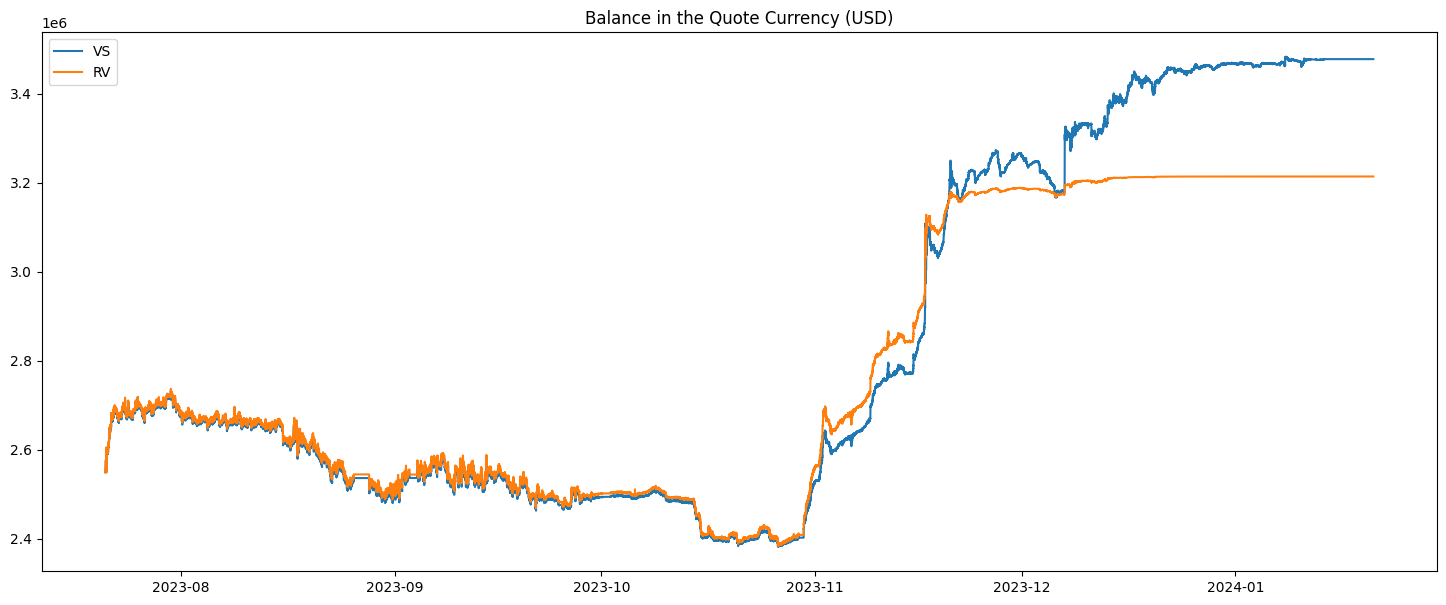

In [11]:
plt.figure(figsize=(18, 7))
plt.plot(df_spot_price['ts'].unique(), balance_in_quote['volatility_surface'], label='VS')
plt.plot(df_spot_price['ts'].unique(), balance_in_quote['realized_volatility'], label='RV')
plt.title("Balance in the Quote Currency (USD)")
plt.legend()

print((balance_in_quote['volatility_surface'][-1]-balance_in_quote['realized_volatility'][-1]) / balance_in_quote['realized_volatility'][-1])

-1.1541164788264431e-07


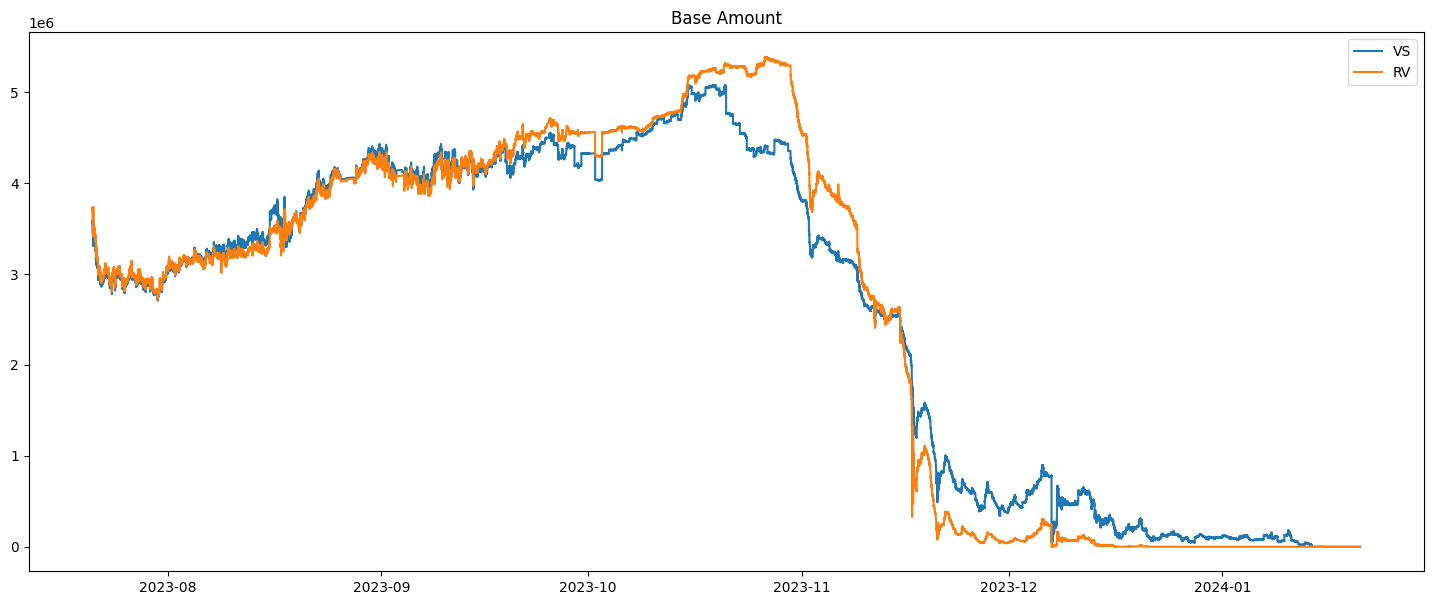

In [12]:
plt.figure(figsize=(18, 7))
plt.plot(df_spot_price['ts'].unique(), base_amount['volatility_surface'], label='VS')
plt.plot(df_spot_price['ts'].unique(), base_amount['realized_volatility'], label='RV')
plt.title("Base Amount")
plt.legend()

print(base_amount['volatility_surface'][-1])

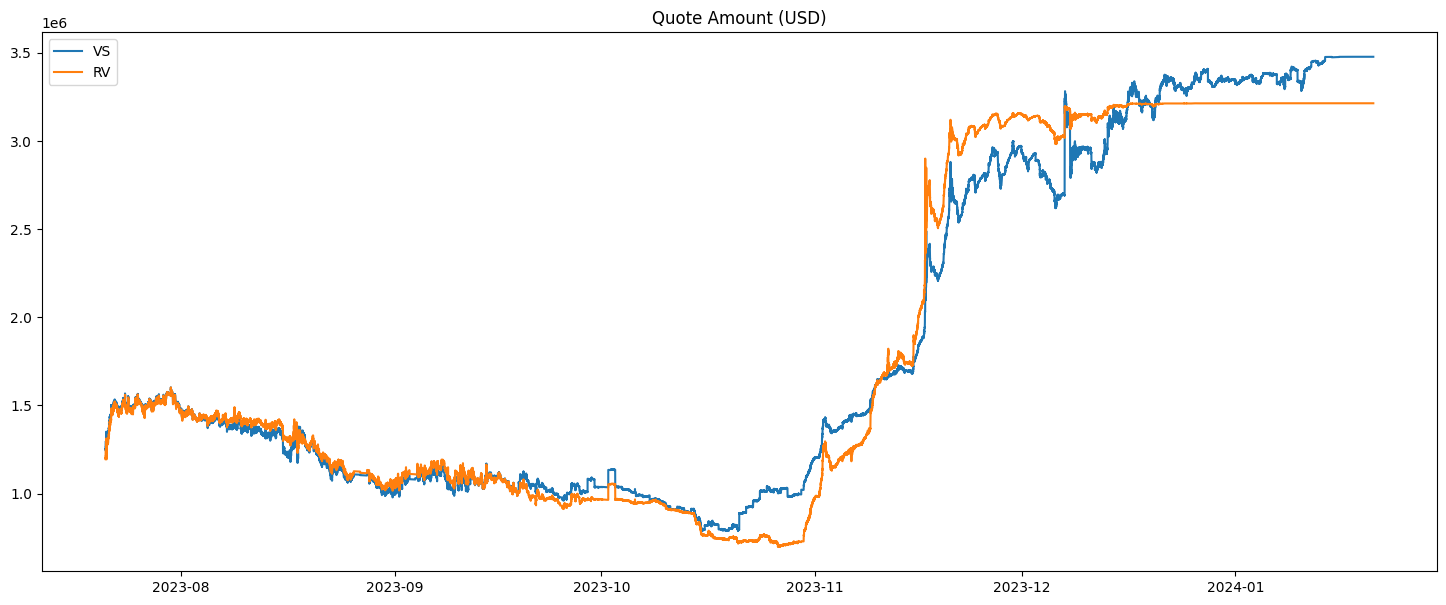

In [13]:
plt.figure(figsize=(18, 7))
plt.plot(df_spot_price['ts'].unique(), quote_amount['volatility_surface'], label='VS')
plt.plot(df_spot_price['ts'].unique(), quote_amount['realized_volatility'], label='RV')
plt.title("Quote Amount (USD)")
plt.legend()

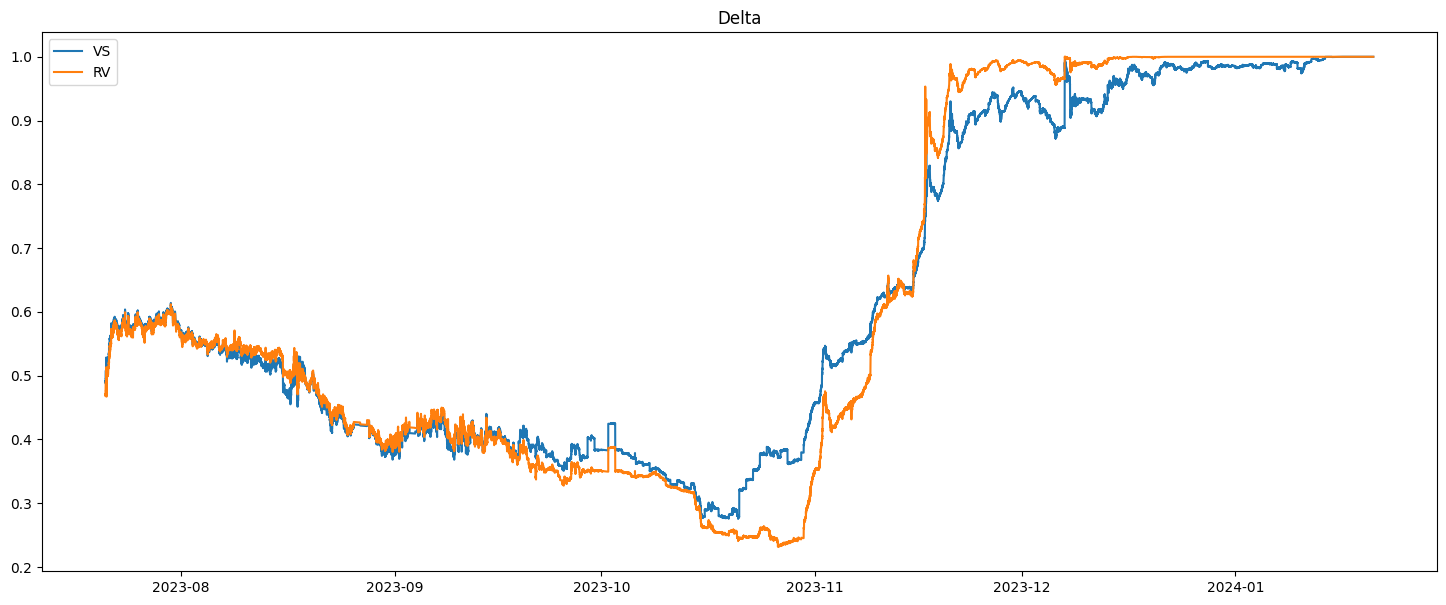

In [14]:
plt.figure(figsize=(18, 7))
plt.plot(df_spot_price['ts'].unique(), delta['volatility_surface'], label='VS')
plt.plot(df_spot_price['ts'].unique(), delta['realized_volatility'], label='RV')
plt.title("Delta")
plt.legend()

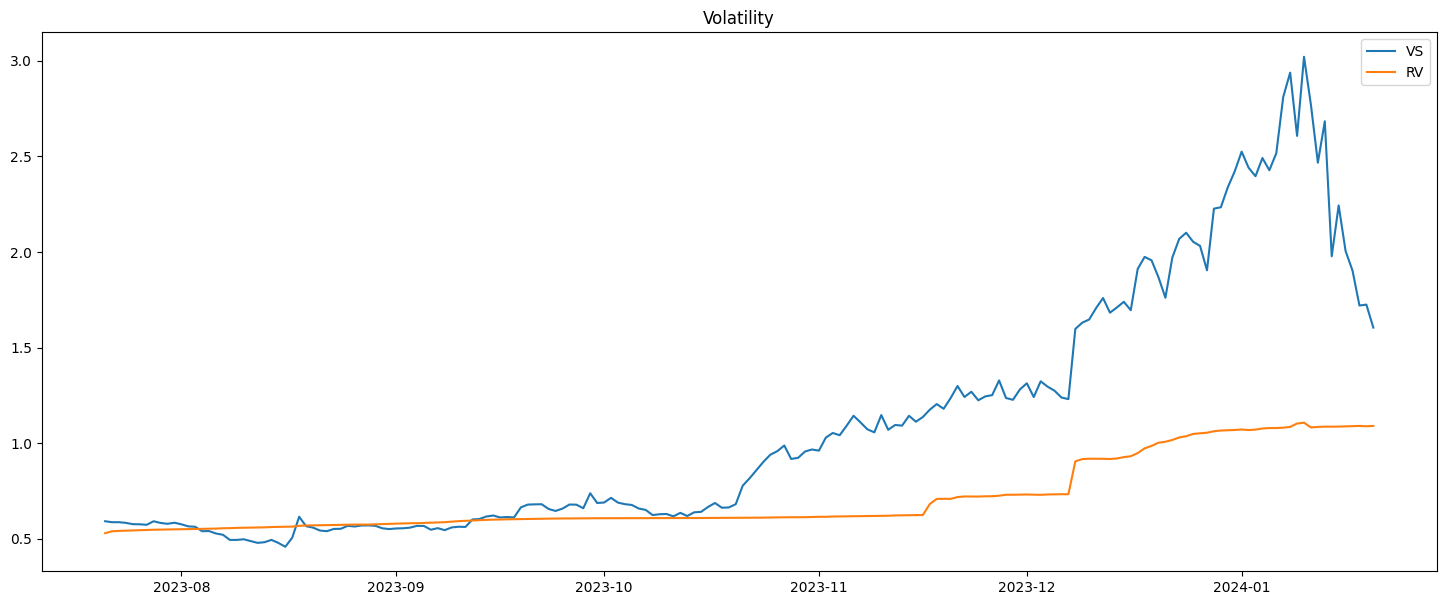

In [15]:
plt.figure(figsize=(18, 7))
plt.plot(df_nodes['current_date'].unique(), implied_volatility['volatility_surface'], label='VS')
plt.plot(df_nodes['current_date'].unique(), implied_volatility['realized_volatility'], label='RV')
plt.title("Volatility")
plt.legend()

Text(0.5, 1.0, 'Interest Rate')

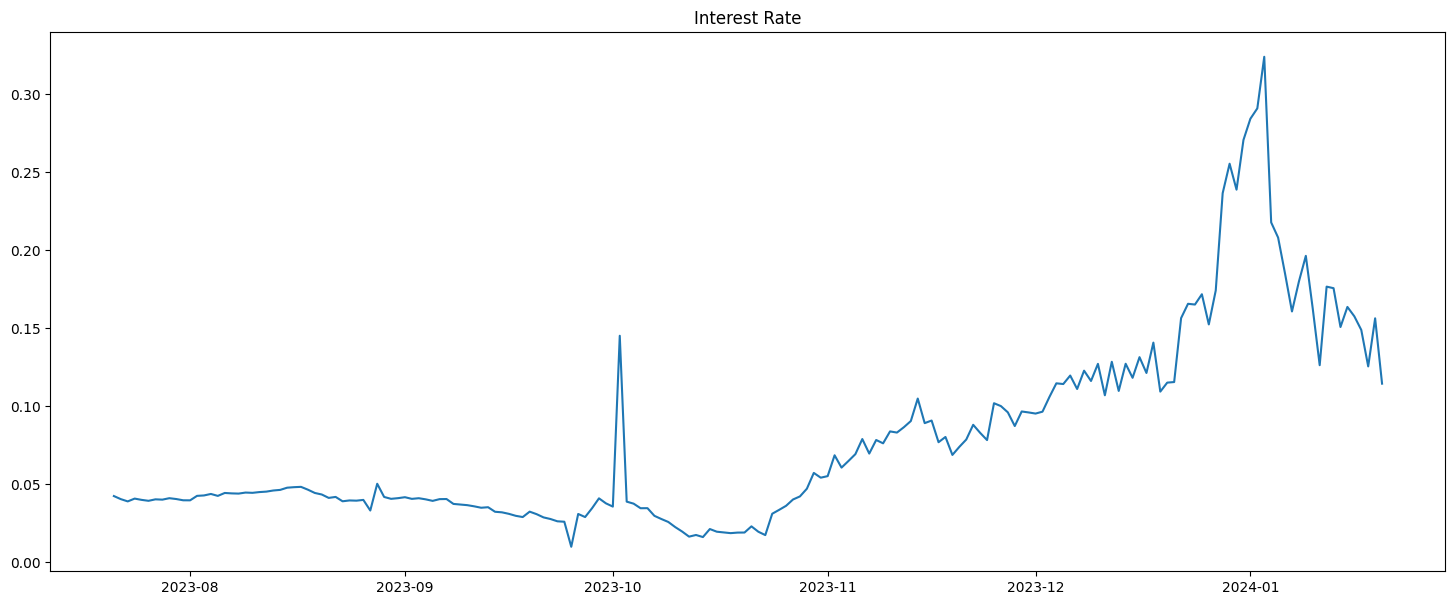

In [17]:
plt.figure(figsize=(18, 7))
plt.plot(df_nodes['current_date'].unique(), interest_rate)
plt.title("Interest Rate")

---
# EXAMPLES

In [19]:
strike = 0.5
current_date = '2023-09-15 00:00:00'


vs = VolatilitySurface(df_nodes, tokens['target'][0], str(current_date), interpolation_types, extrapolation_types)

# Example 1 (OBSERVED)
expiration_date = '2023-09-29 08:00:00'
vs.load_expiration_date(expiration_date)

print(f"Current date: {vs.current_date}")
print(f"Expiration date: {vs.expiration_date}")
print(f"TTE: {vs.time_to_maturity}")
print(f"r: {vs.interest_rate}")
print(f"S: {vs.spot_price}")
print(f"F: {vs.forward_price}")
print(f"IV: {vs.iv_fit_function(strike)}")
print(f"Delta: {vs.delta_function(strike)}")
print(f"Call price: {vs.call_price_function(strike)}")

print("")

# Example 2 (INTERPOLATION)
expiration_date = '2024-01-29 08:00:00'
vs.load_expiration_date(expiration_date)

print(f"Current date: {vs.current_date}")
print(f"Expiration date: {vs.expiration_date}")
print(f"TTE: {vs.time_to_maturity}")
print(f"r: {vs.interest_rate}")
print(f"S: {vs.spot_price}")
print(f"F: {vs.forward_price}")
print(f"IV: {vs.iv_fit_function(strike)}")
print(f"Delta: {vs.delta_function(strike)}")
print(f"Call price: {vs.call_price_function(strike)}")

print("")

# Example 3 (EXTRAPOLATION)
expiration_date = '2024-07-28 08:00:00'
vs.load_expiration_date(expiration_date)

print(f"Current date: {vs.current_date}")
print(f"Expiration date: {vs.expiration_date}")
print(f"TTE: {vs.time_to_maturity}")
print(f"r: {vs.interest_rate}")
print(f"S: {vs.spot_price}")
print(f"F: {vs.forward_price}")
print(f"IV: {vs.iv_fit_function(strike)}")
print(f"Delta: {vs.delta_function(strike)}")
print(f"Call price: {vs.call_price_function(strike)}")

print("")

Expiration Dates: [Timestamp('2023-09-22 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-10-27 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]

<class 'str'>
-> The expiration date has already been observed. No Interpolation/Extrapolation required.
Current date: 2023-09-15 00:00:00
Expiration date: 2023-09-29 08:00:00
TTE: 0.03924252794889345
r: -0.00836158080690536
S: 0.351
F: 0.35088484541529763
IV: 0.9145560910471663
Delta: 0.0311470325188037
Call price: 0.0007246095656895154

<class 'str'>
2024-01-29 08:00:00 [Timestamp('2023-09-22 08:00:00'), Timestamp('2023-09-29 08:00:00'), Timestamp('2023-10-27 08:00:00'), Timestamp('2023-12-29 08:00:00'), Timestamp('2024-03-29 08:00:00'), Timestamp('2024-06-28 08:00:00')]
-> Interpolation required.
Current date: 2023-09-15 00:00:00
Expiration date: 2024-01-29 08:00:00
TTE: 0.3732603239790098
r: 0.03305671030334207
S: 0.351
F: 0.3553577334206719
IV: 0.68592590319073